### Descripción del proyecto
Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.

Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

#### Descripción de los datos
Una base de datos con información sobre viajes en taxi en Chicago:

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

* company_name: nombre de la empresa de taxis
* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes
* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

#### Analisis Exploratorio de datos (Python)

In [1]:
# Librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats

### Para estos dos datasets ahora necesitas
#### Importar los archivos

In [32]:
# Cargamos los datos
df_result_01 = pd.read_csv('../datasets/moved_project_sql_result_01.csv')
df_result_04 = pd.read_csv('../datasets/moved_project_sql_result_04.csv')


#### Exploramos la informacion en los dataframes

In [3]:
df_result_01.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
df_result_01.sample(10)

,company_name,trips_amount
29,303 Taxi,250
14,Patriot Taxi Dba Peace Taxi Associat,2235
58,5062 - 34841 Sam Mestas,8
50,2823 - 73307 Lee Express Inc,15
49,5074 - 54002 Ahzmi Inc,16
15,Checker Taxi Affiliation,2216
48,3623 - 72222 Arrington Enterprises,20
13,Nova Taxi Affiliation Llc,3175
30,Setare Inc,230
51,4623 - 27290 Jay Kim,15


In [5]:
#Verificamos si tenemos duplicados

df_result_01.duplicated().value_counts() # no tenemos valores duplicados

False    64
Name: count, dtype: int64

In [14]:
# Creamos funcion para revisar valores atipicos

def outsider_values(data, column):
    # Crear el boxplot mejorado con líneas para señalar valores atípicos
    plt.figure(figsize=(12, 6))

    # Generar el boxplot
    boxplot = data.boxplot(
        vert=False,  # Boxplots horizontales
        patch_artist=True,
        boxprops=dict(facecolor="lightblue", color="black"),
        medianprops=dict(color="green"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(marker="o", color="orange", alpha=0.5)
    )

    # Añadimos líneas para los valores atípicos

    # Calcular valores estadísticos
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1  # Rango intercuartílico

    # Límites para valores atípicos
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr

    # Añadimos líneas horizontales en los límites
    plt.axvline(x=lower_fence, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Lower Fence' if i == 0 else "")
    plt.axvline(x=upper_fence, color='red', linestyle='--', linewidth=1, alpha=0.7, label='Upper Fence' if i == 0 else "")

    # Personalizamos el gráfico
    plt.title("Boxplot to Identify Outliers with Threshold Lines", fontsize=16, loc='center')
    plt.xlabel("Value Range", fontsize=12)
    plt.ylabel("Variables", fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.legend(loc='upper right', fontsize=10)
    plt.tight_layout()

    # Mostrar el gráfico
    plt.show()

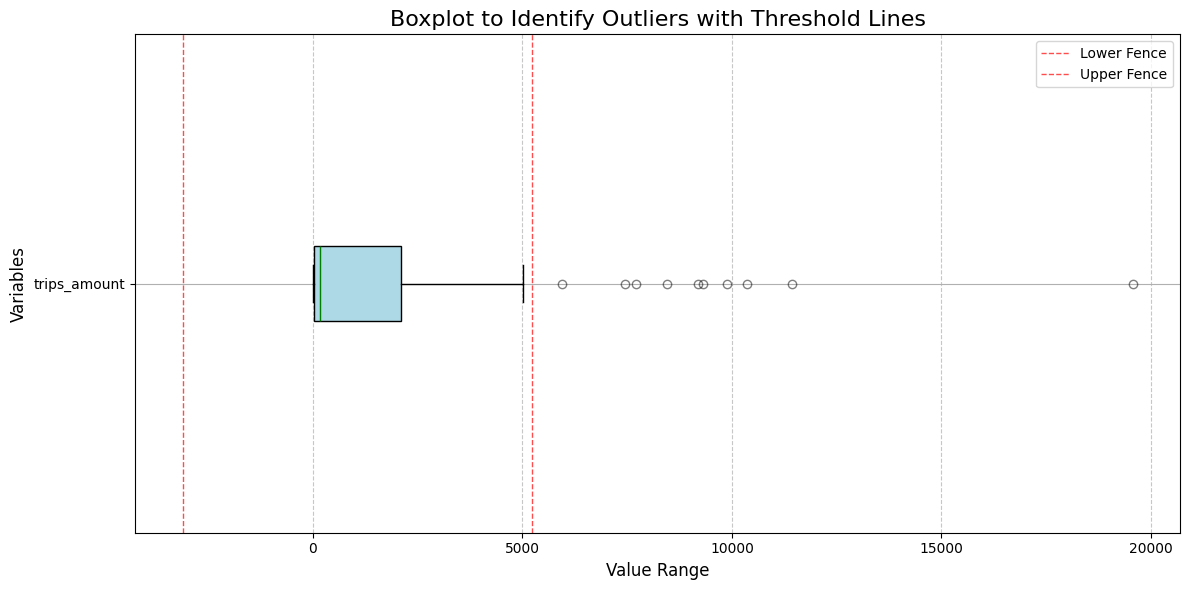

In [ ]:
# Revisamos los valores atipicos
outsider_values(df_result_01, 'trips_amount')

In [ ]:
# Revisamos el dataframe df_result_04

df_result_04.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [20]:
df_result_04.sample(10)

,dropoff_location_name,average_trips
25,Irving Park,296.566667
20,Rush & Division,395.533333
56,Ukrainian Village,27.600000
62,Brighton Park,19.466667
28,Wicker Park,182.600000
22,Lincoln Square,356.733333
10,Lincoln Park,1246.533333
58,Englewood,25.433333
52,Little Village,33.800000
82,South Deering,7.500000


In [ ]:
#Verificamos si tenemos duplicados
df_result_04.duplicated().value_counts()

False    94
Name: count, dtype: int64

In [21]:
# Cambiamos los tipos de datos
df_result_04['dropoff_location_name'] = df_result_04['dropoff_location_name'].astype('category') # cambiamos a tipo categorico
df_result_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   dropoff_location_name  94 non-null     category
 1   average_trips          94 non-null     float64 
dtypes: category(1), float64(1)
memory usage: 3.7 KB


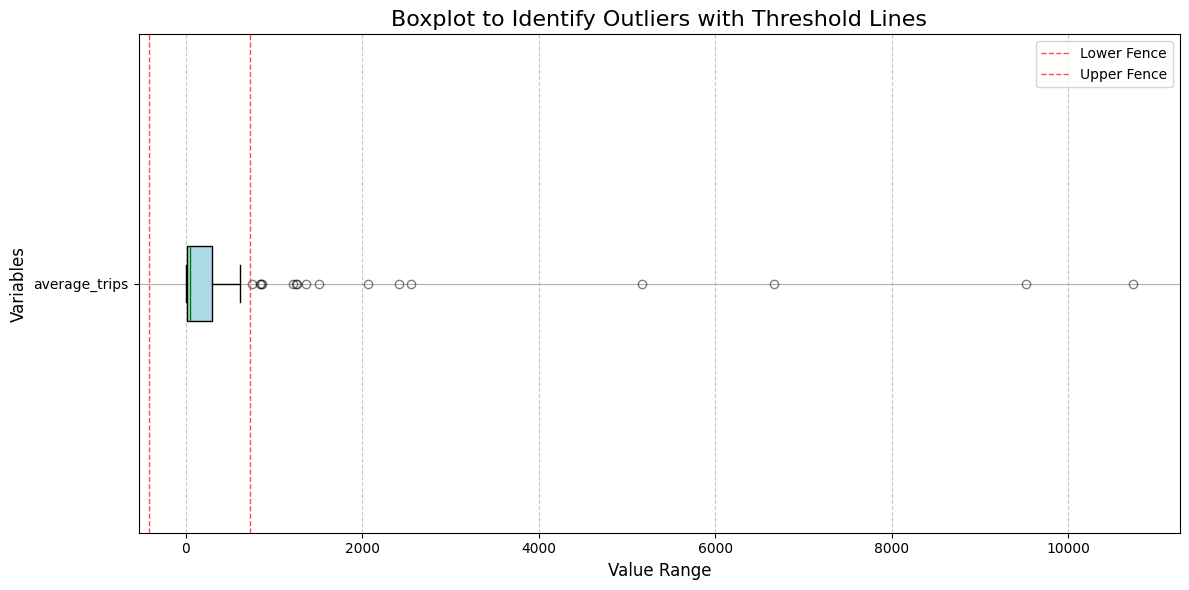

In [24]:
# Revisamos los valores atipicos
outsider_values(df_result_04, 'average_trips')

#### Identificamos los 10 principales barrios en términos de finalización del recorrido

In [29]:
df_result_04.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


#### Gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
#### Sacaremos conclusiones basadas en cada gráfico y explicar los resultados

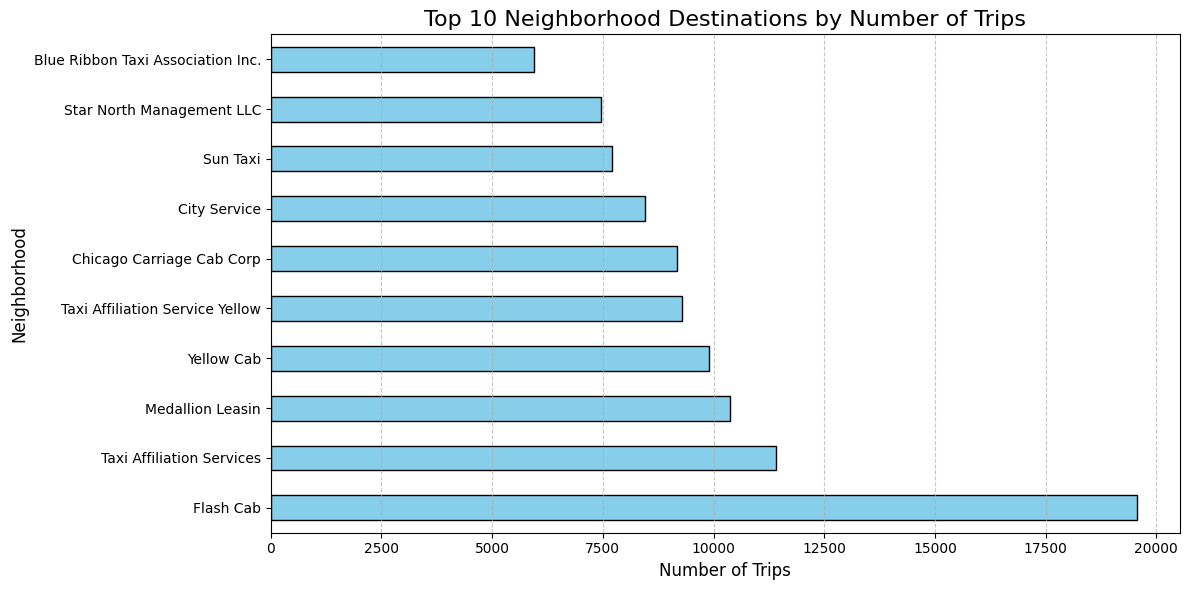

In [ ]:
#Gráfico para los 10 principales barrios destinos con mayor número de viajes

# Filtrar y ordena los datos
top_10 = (
    df_result_01
    .set_index('company_name')  # Establecer índice para un eje claro en el gráfico
    .sort_values('trips_amount', ascending=False)  # Ordenar por cantidad de viajes en orden descendente
    .head(10)  # Seleccionar los 10 principales
)

# Creamos el gráfico mejorado
plt.figure(figsize=(12, 6))
top_10['trips_amount'].plot(
    kind='barh', 
    color='skyblue', 
    edgecolor='black'
)

# Personalizamos el gráfico
plt.title('Top 10 Neighborhood Destinations by Number of Trips', fontsize=16, loc='center')
plt.xlabel('Number of Trips', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


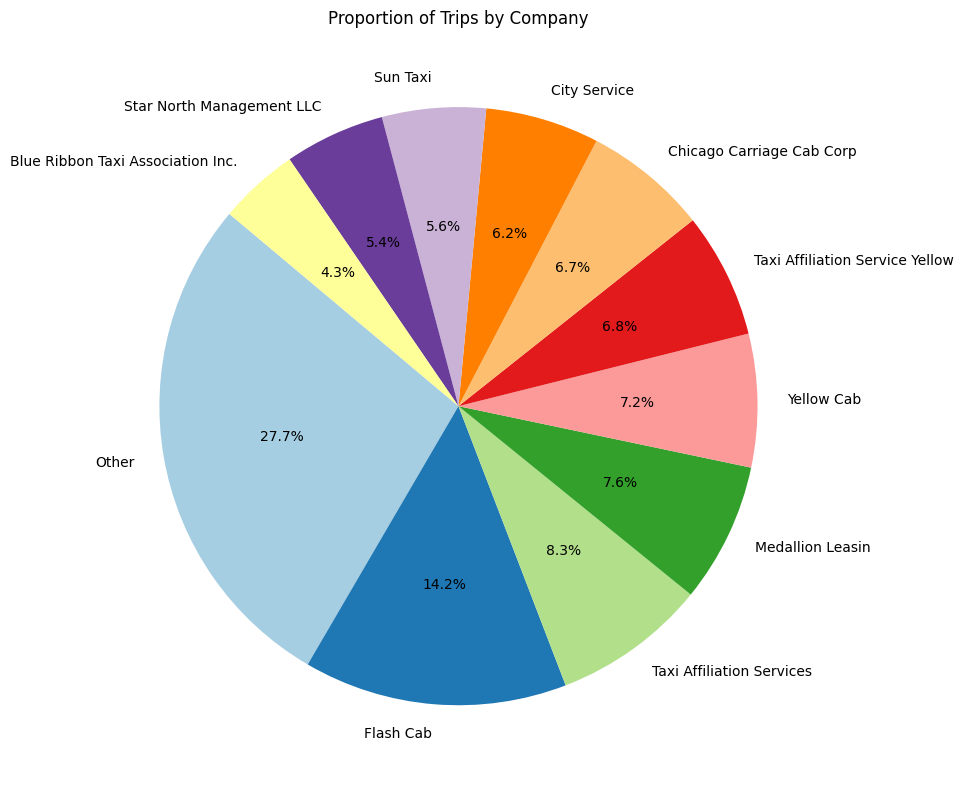

In [23]:
# Revisamos en un grafico pie los porcentajes de los viajes.

# Preparar los datos
df_ptc = df_result_01.copy()
df_ptc['company_name'] = df_ptc['company_name'].apply(lambda x: x if x in top_10.index else 'Other')
df_pie = (
    df_ptc.groupby('company_name')['trips_amount']
    .sum()
    .sort_values(ascending=False)
)

# Creamos el gráfico de pastel mejorado
plt.figure(figsize=(10, 8))
df_pie.plot(
    kind='pie',
    autopct='%1.1f%%',  # Mostrar porcentajes con un decimal
    startangle=140,  # Iniciar el gráfico con un ángulo para mejorar estética
    colors=plt.cm.Paired.colors,  # Colores diferenciados para cada segmento
    legend=False,
    ylabel='',  # Eliminar etiqueta automática del eje Y
    title='Proportion of Trips by Company',  # Título del gráfico
)

# Personalizamos el gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Respuesta: 
- Como podemos ver Flash Cab tiene el 14.2%, Taxi Affiliation Services un 8.3% y Medallion Leasin un 7.6% del mercado.
- Como podemos observar la empresa Flash Cab es el mas usado teniendo practicamente el doble de viajes.
- En others se encuentran todas las demas compañia de taxis, el acumulado es 27.7% pero por separado no supera ninguno el 4.3%

In [30]:
# Cargamos los datos
df_result_07 = pd.read_csv('../datasets/moved_project_sql_result_07.csv')
df_result_07

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [26]:
# Revisamnos los datos
df_result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [33]:
#Cambiamos los tipos de datos
df_result_07['start_ts'] = pd.to_datetime(df_result_07['start_ts'],format= '%Y-%m-%d %H:%M:%S')
df_result_07=df_result_07.astype({'weather_conditions':'category','duration_seconds':'int64'})
df_result_07.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   category      
 2   duration_seconds    1068 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 18.0 KB


### Prueba la hipótesis:
- "La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

In [34]:
# Revisamos promedios de weather_conditions

df_result_07.select_dtypes(exclude='datetime').groupby('weather_conditions', observed=False).mean()

,duration_seconds
weather_conditions,
Bad,2427.205556
Good,1999.675676


In [35]:
# Creamos los grupos de comparacion para la prueba de hipotesis en este caso para buen clima
good_group = df_result_07[df_result_07['weather_conditions']=='Good'].select_dtypes(exclude='datetime')['duration_seconds']
good_group

0       2410
1       1920
2       1543
3       2512
4       1440
        ... 
1062    1500
1063       0
1064    1318
1065    2100
1066    1380
Name: duration_seconds, Length: 888, dtype: int64

In [36]:
# Creamos los grupos de comparacion para la prueba de hipotesis en este caso para mal clima
bad_group = df_result_07[df_result_07['weather_conditions']=='Bad'].select_dtypes(exclude='datetime')['duration_seconds']
bad_group

6       2969
30      1980
34      2460
51      2760
52      2460
        ... 
1031    2560
1032    1908
1053    2400
1061    2186
1067    2834
Name: duration_seconds, Length: 180, dtype: int64

In [38]:
#Calculamos la varianza para el grupo con buen clima
print("La varianza de Good Conditions es ",good_group.var())

La varianza de Good Conditions es  576382.009689509


In [39]:
#Calculamos la varianza para el grupo con mal clima
print("La varianza de Bad Conditions es ",bad_group.var())

La varianza de Bad Conditions es  520294.086002483


In [40]:
t_stat, p_value = stats.ttest_ind(good_group, bad_group)
    
# Realizar la prueba de Levene
stat, p_value = stats.levene(good_group, bad_group)

print("Resultados de la hipotesis para las varianzas")
print(f'Estadístico de Levene: {stat}')
print(f'Valor p: {p_value}')

# Evaluar el resultado
alpha = 0.05
if p_value > alpha:
    print("No se rechaza la hipótesis nula (las varianzas son iguales)")
else:
    print("Se rechaza la hipótesis nula (las varianzas son diferentes)")    
    
print()

# Resultados
print("Resultados de la hipotesis para las medias")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Evaluamos las medias de ambos grupos
# Interpretación del p-valor
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Las medias de los dos grupos son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las medias son diferentes.")


Resultados de la hipotesis para las varianzas
Estadístico de Levene: 0.38853489683656073
Valor p: 0.5332038671974493
No se rechaza la hipótesis nula (las varianzas son iguales)

Resultados de la hipotesis para las medias
T-statistic: -6.946177714041499
P-value: 0.5332038671974493
No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que las medias son diferentes.


#### Explicacion:
Cómo planteaste las hipótesis nula y alternativa

Respuesta:
- La Hipotesis Nula, siempre propone que las medias de ambos grupos son iguales, por lo menos estadisticamente iguales.
- La Hipotesis Alternativa, propone que las medias de ambos grupos no son iguales o no son significativamente iguales.
- Podemos ver tambien que las varianzas sun valores muy cercanos

#### ¿ Qué criterio usaste para probar las hipótesis y por qué?

Respuesta:
- Como vemos tomamos el valor alpha de 0.05 para el nivel de significacion.
- Evaluamos con el metodo stats.levene de la libreria spicy que calcula el estadístico t y el p-valor para las muestras independientes para comparar las varianzas de las muestras.
- Evaluamos con el metodo ttest.ind de la libreria spicy que calcula el estadístico t y el p-valor para las muestras independientes para comparar las medias de las muestras.